In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Листинг 2.1 Поиск профиля штрих-кода вдоль оси Ox

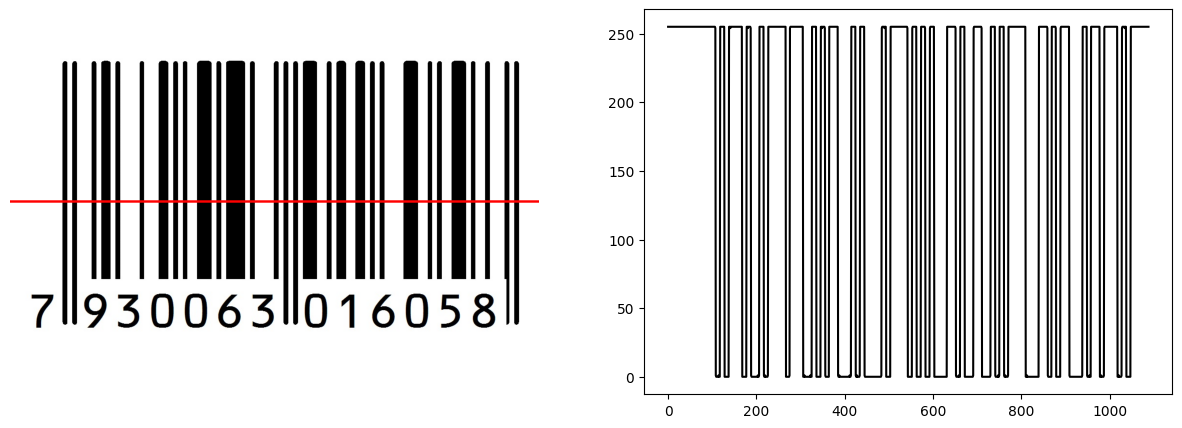

In [108]:
image = cv2.cvtColor(cv2.imread("barcode.png"), cv2.COLOR_BGR2GRAY)

fig, axis = plt.subplots(1, 2, figsize=(15,5))

image_line = cv2.imread("barcode.png")

cv2.line(image_line, (0, image.shape[0] // 2), (image.shape[1], image.shape[0] // 2), color=(0, 0, 255), thickness=3)
axis[0].imshow(cv2.cvtColor(image_line, cv2.COLOR_BGR2RGB))
axis[0].axis('off')

profile = image[image.shape[0] // 2]
axis[1].plot(profile, color='black')

plt.show()

### Листинг 2.2. Определение положения текста

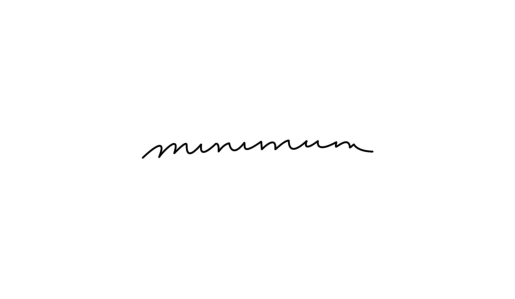

In [115]:
image = cv2.cvtColor(cv2.imread("text.jpg"), cv2.COLOR_BGR2GRAY)

Ox_projection = np.sum(255 - image, axis=0)
Oy_projection = np.sum(255 - image, axis=1)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

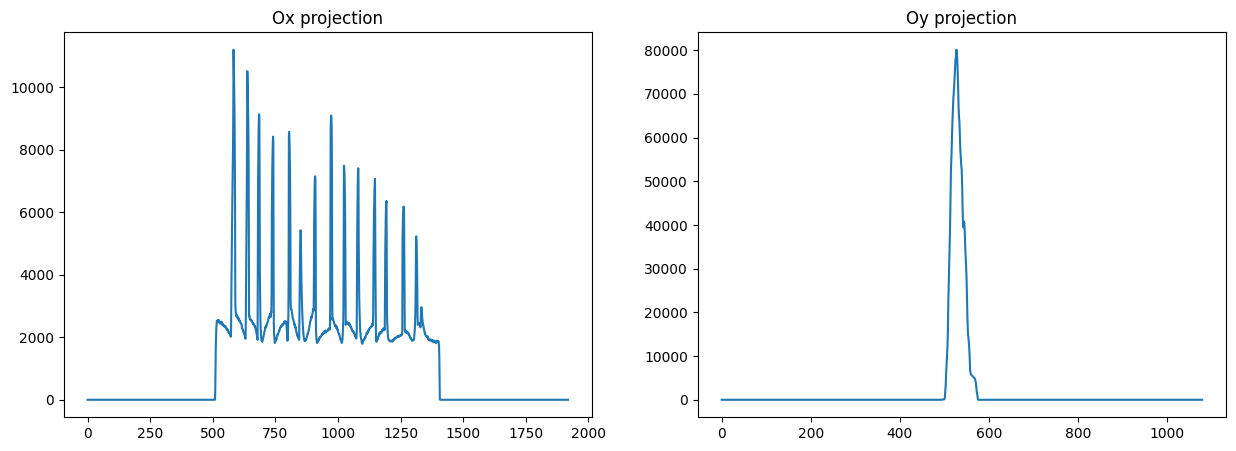

In [116]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))

axis[0].set_title('Ox projection')
axis[0].plot(Ox_projection)

axis[1].set_title('Oy projection')
axis[1].plot(Oy_projection)

plt.show()

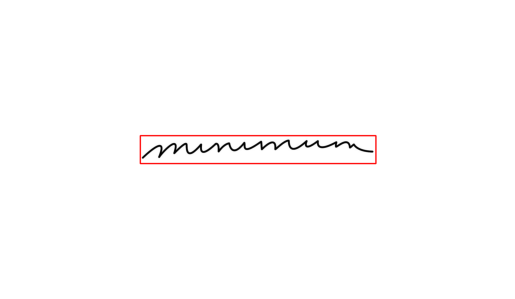

In [127]:
def find_corners(projection):
    res1 = 50
    res2 = 0

    for i, val in enumerate(projection):
        if val > 0:
            res1 = i
            break
       
    for i, val in enumerate(projection, start=-len(projection)):
        if val > 0:
            res2 = abs(i)
            break

    return res1, res2

x1, x2 = find_corners(Ox_projection)
y1, y2 = find_corners(Oy_projection)

image = cv2.rectangle(cv2.imread("text.jpg"), (x1, y1 - 10), (x2, y2 + 10), color=(255,0,0), thickness=3)

plt.axis('off')
plt.imshow(image)
plt.show()

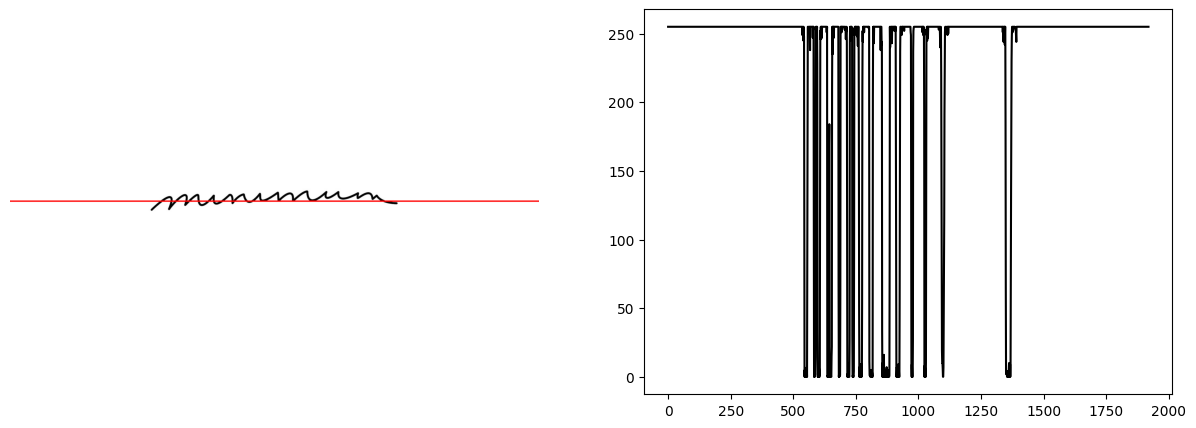

In [128]:
image = cv2.cvtColor(cv2.imread("text.jpg"), cv2.COLOR_BGR2GRAY)

fig, axis = plt.subplots(1, 2, figsize=(15,5))

image_line = cv2.imread("text.jpg")

cv2.line(image_line, (0, image.shape[0] // 2), (image.shape[1], image.shape[0] // 2), color=(0, 0, 255), thickness=3)
axis[0].imshow(cv2.cvtColor(image_line, cv2.COLOR_BGR2RGB))
axis[0].axis('off')

profile = image[image.shape[0] // 2]
axis[1].plot(profile, color='black')

plt.show()

In [ ]:
from math import pi

for t in range(-pi, pi, 0.01):
    5*t/pi - 